In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Split the dataset into features (X) and target variable (y)

In [57]:
df = pd.read_csv('heart_failure_clinical_records.csv')
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

Number of Death and alive

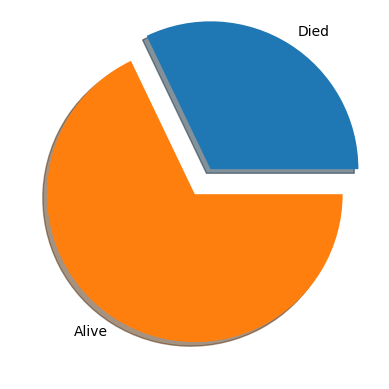

In [71]:
num_of_died = df['DEATH_EVENT'][df.DEATH_EVENT == 1]
num_of_alive = df['DEATH_EVENT'][df.DEATH_EVENT == 0]

len_of_died = len(num_of_died)
len_of_alive = len(num_of_alive)

arr = np.array([len_of_died, len_of_alive])
label = ['Died', 'Alive']

plt.pie(arr, labels=label, shadow=True, explode=[0.2, 0.0])
plt.show()

Take The age

C:\Users\Talha\AppData\Local\Temp\ipykernel_4140\2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

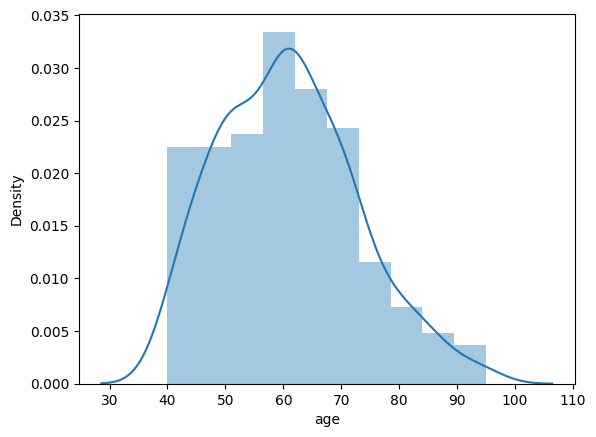

In [74]:
sns.distplot(df.age)

age after 50 alive and dead

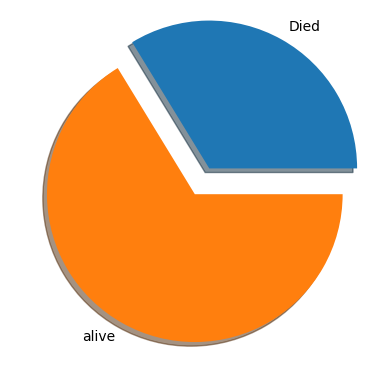

In [75]:
age_above_50_not_died = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 0]
age_above_50_died = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 1]


len_of_above_50_died = len(age_above_50_died)
len_of_above_50_not_died = len(age_above_50_not_died)

arr1 = np.array([len_of_above_50_died, len_of_above_50_not_died])
label = ['Died', 'alive']

plt.pie(arr1, labels=label, shadow=True, explode=[0.2, 0.0])
plt.show()

Dead With Diabetes and alive

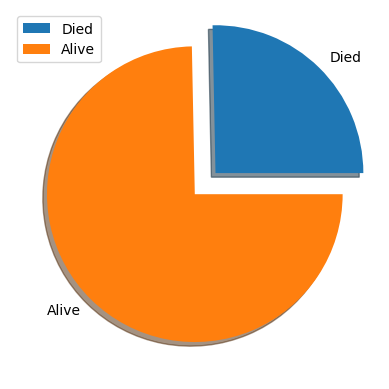

In [76]:
patient_nhave_diabetes_0 = df['DEATH_EVENT'][df.diabetes == 0][df.DEATH_EVENT == 0]
patient_have_diabetes_1 = df['DEATH_EVENT'][df.diabetes == 1][df.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
label = ['Died', 'Alive']

plt.pie(arr2, labels=label, explode=[0.2, 0.0], shadow=True)
plt.legend()
plt.show()

Let's Check The Correlation of It

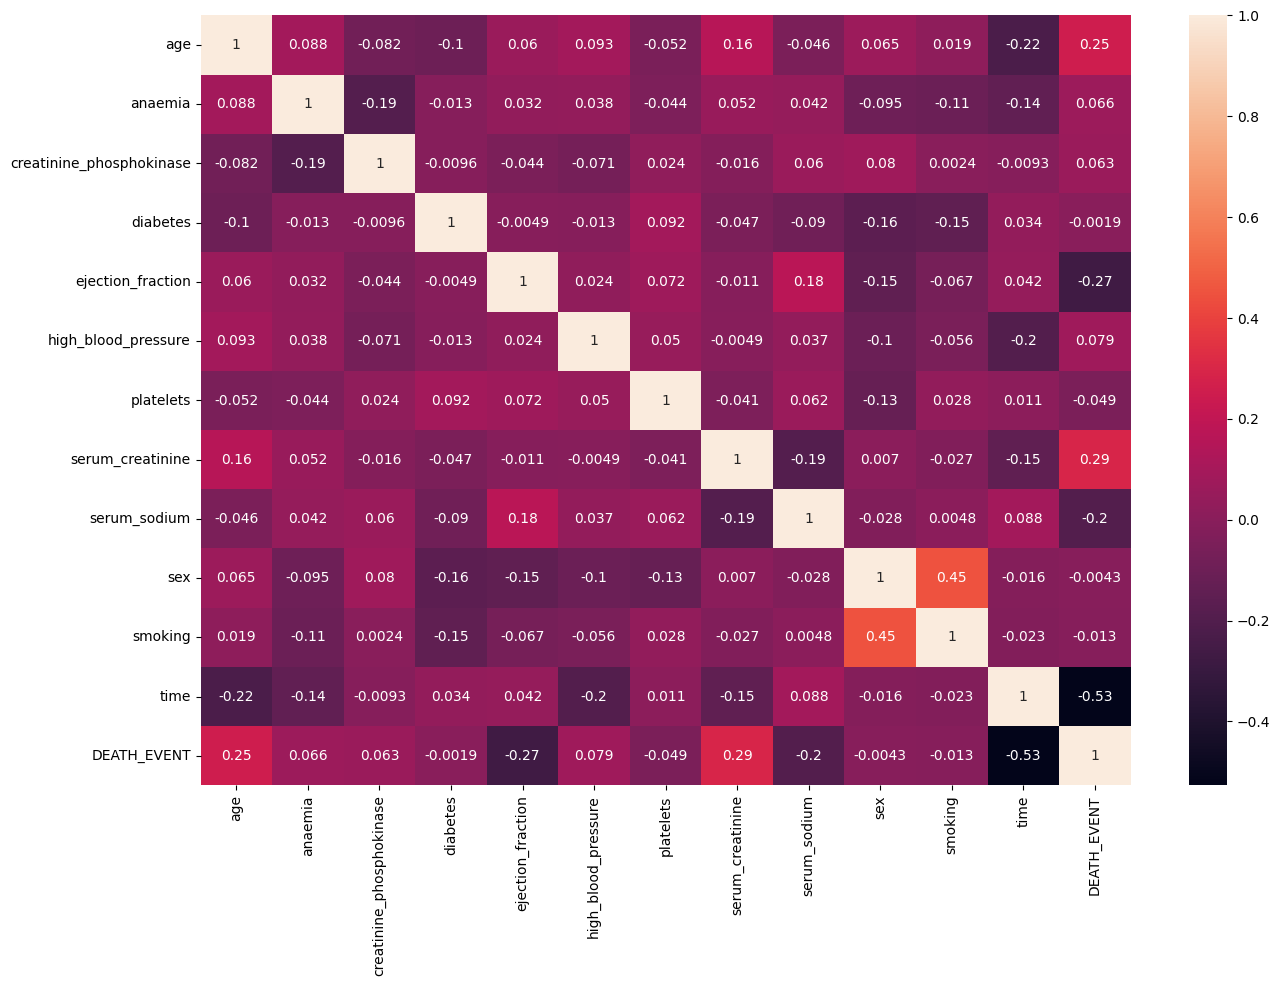

In [77]:
correlation = df.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, annot=True)
plt.show()

and

In [78]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Split the data into training and testing sets


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Initialize the logistic regression model


In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [61]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

Confusion matrix Applying

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

In [63]:
cm = confusion_matrix(y_test, y_pred)

In [64]:
cm

array([[35,  2],
       [14,  9]], dtype=int64)

Applying ROC Curve

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

In [66]:
roc_auc

0.826086956521739

lets check the accuracy

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred)}')
print(f'Precision Score:- {precision_score(y_test,y_pred)}')
print(f'Recall Score:- {recall_score(y_test,y_pred)}')
print(f'Confusion Matrix:- \n{confusion_matrix(y_test, y_pred)}')


Accuracy Score:- 0.7333333333333333
Precision Score:- 0.8181818181818182
Recall Score:- 0.391304347826087
Confusion Matrix:- 
[[35  2]
 [14  9]]


let's plot the Confusion Matrix 

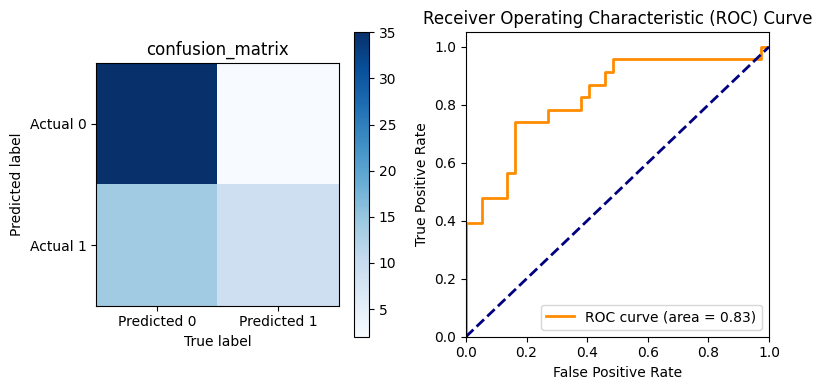

Accuracy Score:- 0.7333333333333333
Precision Score:- 0.8181818181818182
Recall Score:- 0.391304347826087
Confusion Matrix:- 
[[35  2]
 [14  9]]


In [80]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion_matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

# plot the ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred)}')
print(f'Precision Score:- {precision_score(y_test,y_pred)}')
print(f'Recall Score:- {recall_score(y_test,y_pred)}')
print(f'Confusion Matrix:- \n{confusion_matrix(y_test, y_pred)}')

YOU CAN DO MORE WITH THAT IS YOU WANT :, IF IT HELP AND YOU LIKED IT, MASSAGE ME ON LINKEDIN AND ALSO CHECK MY GITHUB
LINKEDIN :- https://www.linkedin.com/in/muhammad-talha-617065235/
GITHUB :- https://github.com/MuhammadTalha121